In [ ]:
import pandas as pd
from pandas.tseries.holiday import AbstractHolidayCalendar,Holiday,nearest_workday
from pandas.tseries.offsets import CustomBusinessDay

In [ ]:
pd.date_range(start="2024-08-01",end="2024-08-31",freq="B") # B,D,W,h

DatetimeIndex(['2024-08-01', '2024-08-02', '2024-08-05', '2024-08-06',
               '2024-08-07', '2024-08-08', '2024-08-09', '2024-08-12',
               '2024-08-13', '2024-08-14', '2024-08-15', '2024-08-16',
               '2024-08-19', '2024-08-20', '2024-08-21', '2024-08-22',
               '2024-08-23', '2024-08-26', '2024-08-27', '2024-08-28',
               '2024-08-29', '2024-08-30'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
class MyCalendar(AbstractHolidayCalendar):
     rules = [Holiday("Independance Day",month=8,day=15,observance=nearest_workday),
              Holiday("My Birth Day",month=8,day=14,observance=nearest_workday),
              Holiday("Random Day",month=8,day=17,observance=nearest_workday),
              ]

In [ ]:
my_custom_calender = MyCalendar()

In [ ]:
custom_business_days = CustomBusinessDay(calendar=my_custom_calender)

In [ ]:
pd.date_range(start="2024-08-01",end="2024-08-31",freq=custom_business_days)

DatetimeIndex(['2024-08-01', '2024-08-02', '2024-08-05', '2024-08-06',
               '2024-08-07', '2024-08-08', '2024-08-09', '2024-08-12',
               '2024-08-13', '2024-08-19', '2024-08-20', '2024-08-21',
               '2024-08-22', '2024-08-23', '2024-08-26', '2024-08-27',
               '2024-08-28', '2024-08-29', '2024-08-30'],
              dtype='datetime64[ns]', freq='C')

In [ ]:
custom_business_days_for_dubai = CustomBusinessDay(weekmask="Sun Mon Tue Wed Thu")

In [ ]:
pd.date_range(start="2024-08-01",end="2024-08-31",freq=custom_business_days_for_dubai)

DatetimeIndex(['2024-08-01', '2024-08-04', '2024-08-05', '2024-08-06',
               '2024-08-07', '2024-08-08', '2024-08-11', '2024-08-12',
               '2024-08-13', '2024-08-14', '2024-08-15', '2024-08-18',
               '2024-08-19', '2024-08-20', '2024-08-21', '2024-08-22',
               '2024-08-25', '2024-08-26', '2024-08-27', '2024-08-28',
               '2024-08-29'],
              dtype='datetime64[ns]', freq='C')

In [ ]:
# Rolling

In [ ]:
df = pd.DataFrame({"Days": ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"],
                   "sales": [300,500,200,100,600,650,700]})

In [ ]:
df

,Days,sales
0,Mon,300
1,Tue,500
2,Wed,200
3,Thu,100
4,Fri,600
5,Sat,650
6,Sun,700


In [ ]:
df['sales'].rolling(window=3).mean()

,sales
0,NaN
1,NaN
2,333.333333
3,266.666667
4,300.000000
5,450.000000
6,650.000000


In [ ]:
data = pd.read_csv("./RELIANCE-EQ.csv",parse_dates=["Date "],index_col="Date ")

In [ ]:
data['close ']

,close
Date,
2024-08-27,"3,000.90"
2024-08-26,"3,025.20"
2024-08-23,"2,999.95"
2024-08-22,"2,996.25"
2024-08-21,"2,997.35"
...,...
2023-09-01,"2,412.65"
2023-08-31,"2,407.00"
2023-08-30,"2,418.05"


In [ ]:
def format_price(price):
  price = price.split(",")
  return float("".join(price))

data['close '] = data['close '].apply(format_price)

In [ ]:
list(map(str,[12,56,78,90]))

['12', '56', '78', '90']

<Axes: xlabel='Date '>

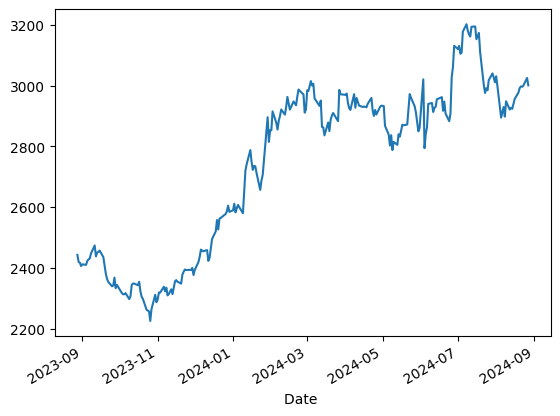

In [ ]:
data['close '].plot()

In [ ]:
data['close '].resample('S').mean()

,close
Date,
2023-08-28 00:00:00,2443.75
2023-08-28 00:00:01,NaN
2023-08-28 00:00:02,NaN
2023-08-28 00:00:03,NaN
2023-08-28 00:00:04,NaN
...,...
2024-08-26 23:59:56,NaN
2024-08-26 23:59:57,NaN
2024-08-26 23:59:58,NaN


In [19]:
import pandas as pd
from pandas.tseries.offsets import CustomBusinessDay
import numpy as np

Task:
Create a time series starting from January 1, 2024, for 10 periods
using custom business days (Tuesday to Saturday). Then, arrange the
data to a weekly frequency and calculate the moving average with a
window of 3 periods to analyze sales trends.


In [46]:
custom_freq = CustomBusinessDay(weekmask="Tue Wed Thu Fri Sat")
dates = pd.date_range(start="2024-01-01",periods=50,freq=custom_freq)
dates

DatetimeIndex(['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
               '2024-01-06', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-13', '2024-01-16', '2024-01-17',
               '2024-01-18', '2024-01-19', '2024-01-20', '2024-01-23',
               '2024-01-24', '2024-01-25', '2024-01-26', '2024-01-27',
               '2024-01-30', '2024-01-31', '2024-02-01', '2024-02-02',
               '2024-02-03', '2024-02-06', '2024-02-07', '2024-02-08',
               '2024-02-09', '2024-02-10', '2024-02-13', '2024-02-14',
               '2024-02-15', '2024-02-16', '2024-02-17', '2024-02-20',
               '2024-02-21', '2024-02-22', '2024-02-23', '2024-02-24',
               '2024-02-27', '2024-02-28', '2024-02-29', '2024-03-01',
               '2024-03-02', '2024-03-05', '2024-03-06', '2024-03-07',
               '2024-03-08', '2024-03-09'],
              dtype='datetime64[ns]', freq='C')

In [50]:
data = np.linspace(500,1000,50)

In [51]:
df = pd.DataFrame({"Date": dates,"Sales": data})

In [52]:
df.set_index('Date',inplace=True)

In [53]:
df

,Sales
Date,
2024-01-02,500.000000
2024-01-03,510.204082
2024-01-04,520.408163
2024-01-05,530.612245
2024-01-06,540.816327
2024-01-09,551.020408
2024-01-10,561.224490
2024-01-11,571.428571
2024-01-12,581.632653


In [54]:
new_df = pd.DataFrame(df['Sales'].resample('W-Sat').mean())
new_df

,Sales
Date,
2024-01-06,520.408163
2024-01-13,571.428571
2024-01-20,622.448980
2024-01-27,673.469388
2024-02-03,724.489796
2024-02-10,775.510204
2024-02-17,826.530612
2024-02-24,877.551020
2024-03-02,928.571429


In [58]:
# 1 - 100 - NaN
# 2 - 50  - NaN
# 3  - 60 - Nan
# 4 - 90 - Nan
# 5 - 110  - 60
# 6 - 210
# 7 - 200


# window = 5
new_df['Sales'].rolling(window=4).mean()

,Sales
Date,
2024-01-06,NaN
2024-01-13,NaN
2024-01-20,NaN
2024-01-27,596.938776
2024-02-03,647.959184
2024-02-10,698.979592
2024-02-17,750.000000
2024-02-24,801.020408
2024-03-02,852.040816


<Axes: xlabel='Date'>

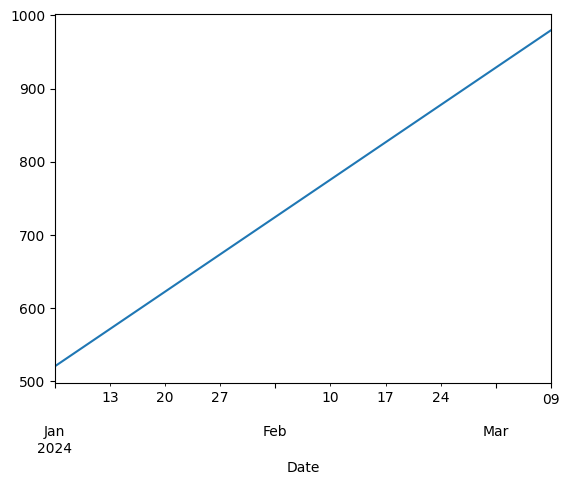

In [59]:
new_df['Sales'].plot()

In [79]:
data2 = {
 'date': ['2024-01-01', '2024-01-15', '2024-02-01', '2024-02-15',
'2024-03-01'],
 'value': [100, 200, 300, 400, 500]
}

In [80]:
df2 = pd.DataFrame(data2)

In [65]:
df2['date'] = pd.to_datetime(df2['date'])

In [88]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5 non-null      datetime64[ns]
 1   value   5 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 208.0 bytes


In [87]:
df2['date'] = df2['date'].astype('datetime64[ns]')

In [89]:
df2.set_index('date',inplace=True)

<Axes: xlabel='date'>

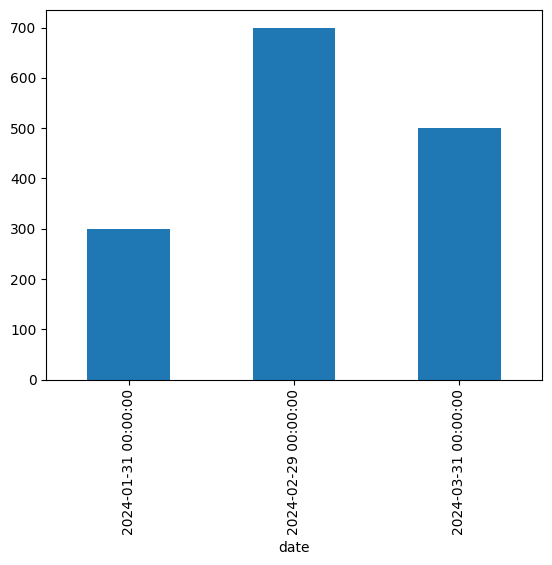

In [90]:
df2['value'].resample('M').sum().plot(kind="bar")

In [77]:
type("2024-01-31")

str

In [76]:
int("5")

5

In [96]:
pd.to_datetime("abc",format="%Y@%m@%d",errors="ignore")

'abc'

Situation:
As part of a company's quarterly performance review, you're asked to
analyze daily production data for the year 2024. The goal is to
identify the production variability within each quarter. You need to
arrange the data to a quarterly frequency and apply a custom function
to calculate the difference between the maximum and minimum production
values for each quarter.
**Task:**
Create a time series for the year 2024 with a daily frequency. Then,
arrange the data to a quarterly frequency. Finally, apply a custom
function that subtracts the minimum value from the maximum value for
each quarter to measure production variability.

In [99]:
df_range = pd.date_range(start="2024-01-01",periods=366,freq="D")

In [101]:
df_range

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10',
               ...
               '2024-12-22', '2024-12-23', '2024-12-24', '2024-12-25',
               '2024-12-26', '2024-12-27', '2024-12-28', '2024-12-29',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [102]:
random_data = np.random.randint(600,900,len(df_range))

In [103]:
random_data

array([865, 725, 615, 723, 756, 821, 608, 673, 856, 640, 616, 839, 654,
       722, 662, 633, 800, 777, 779, 654, 677, 613, 843, 741, 886, 758,
       689, 740, 631, 892, 883, 618, 693, 677, 694, 848, 756, 674, 816,
       615, 618, 718, 671, 745, 735, 803, 884, 889, 850, 644, 733, 604,
       671, 782, 890, 871, 743, 734, 846, 685, 834, 750, 611, 712, 868,
       820, 662, 785, 679, 832, 642, 837, 835, 645, 801, 765, 728, 623,
       603, 885, 872, 712, 614, 651, 679, 843, 873, 778, 653, 834, 873,
       833, 641, 690, 868, 886, 809, 744, 728, 759, 801, 844, 854, 622,
       696, 667, 695, 682, 662, 846, 677, 648, 837, 715, 867, 695, 771,
       824, 829, 673, 768, 835, 671, 736, 813, 855, 630, 723, 753, 806,
       813, 613, 769, 604, 815, 628, 639, 703, 865, 863, 750, 632, 859,
       609, 780, 796, 758, 886, 737, 858, 715, 741, 733, 821, 898, 762,
       768, 646, 686, 786, 618, 644, 805, 618, 683, 765, 703, 743, 655,
       609, 600, 644, 870, 717, 642, 801, 644, 851, 894, 640, 74

In [104]:
df3 = pd.DataFrame({"date":df_range,"value": random_data })

In [106]:
df3.set_index('date',inplace=True)

In [116]:
df3

,value
date,
2024-01-01,865
2024-01-02,725
2024-01-03,615
2024-01-04,723
2024-01-05,756
...,...
2024-12-27,744
2024-12-28,682
2024-12-29,747


In [120]:
def custom_function(sampledData):
    return sampledData.max() - sampledData.min()


In [123]:
df3['value'].resample("Q").apply(custom_function)

,value
date,
2024-03-31,289
2024-06-30,298
2024-09-30,297
2024-12-31,288


In [122]:
df3['value'].resample("Q").sum()

,value
date,
2024-03-31,67577
2024-06-30,67685
2024-09-30,69035
2024-12-31,67764
